In [54]:
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib widget

In [55]:
# Water
A_dict = {
    "A1": (3.55959, 643.748, -198.043),
    "A2": (5.40221 , 1838.675 , -31.737),
    # "A5": (5.08354 , 1663.125 , -45.622),
    "A7": (4.6543 , 1435.264 , -64.848)
}
T_boil = 373.0
P_boil = 1.0    # bar 

T_trip = 273.16
P_trip = 611.655 * 1.0e-5  # bar 

L_evap = 40700.0 
T_crit = 647.096 

In [56]:
# Methane
# A_dict = {
#     "A1": (3.9895, 443.028, -0.49),
#     "A4": (4.22061,	516.689, 11.223)
# }
# T_boil = 111.0

In [57]:
# Antoine equation (pressure [bar])
def antoine(t,A):
    return 10**( A[0] - (A[1]/(t+A[2])) )

In [58]:
def integ_clausius(t1,p1,t2,L):
    lnp2p1 = -(L/8.314) * (1/t2 - 1/t1)

    p2 = np.exp(lnp2p1) * p1
    return p2

In [59]:
def wp_solid(t:float):

    if t > T_trip:
        return np.nan

    t_n = 273.16 # K
    p_n = 0.000611657 * 1e6  # Pa

    theta = t/t_n 
    rhs = -13.928169*(1-theta**(-1.5)) + 34.7078238*(1-theta**(-1.25))
    out = np.exp(rhs) * p_n * 1.0e-5
    return out 

In [66]:
def wp_liquid(t:float):

    if t < T_trip:
        return np.nan 
    
    t_c = 647.096
    p_c = 22.064 * 1.0e6 # Pa
    a_1 = -7.85951783
    a_2 = 1.84408259
    a_3 = -11.7866497
    a_4 = 22.6807411
    a_5 = -15.9618719
    a_6 = 1.80122502

    q = 1 - t/t_c

    rhs = (t_c/t) * (a_1*q + a_2*q**1.5 + a_3*q**3 + a_4*q**3.5 + a_5*q**4 + a_6*q**7.5)
    out = np.exp(rhs) * p_c * 1.0e-5
    return out 


In [67]:
def wp_both(t:float):
    if t > T_trip:
        return wp_liquid(t)
    else:
        return wp_solid(t)

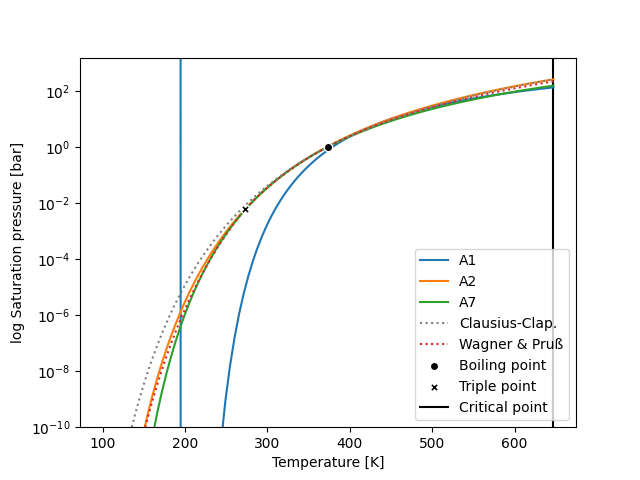

In [91]:
plt.close("all")

fig,ax = plt.subplots(1,1)

arr_t = np.linspace(100, T_crit, 100)

for k in A_dict.keys():
    Acoeffs = A_dict[k]
    arr_p = antoine(arr_t,Acoeffs)
    ax.plot(arr_t, arr_p, label=k)

ax.plot(arr_t, integ_clausius(T_boil, P_boil*1e5, arr_t, L_evap)*1.0e-5 ,c='grey', ls='dotted', label="Clausius-Clap.")
ax.plot(arr_t, [wp_both(t) for t in arr_t], ls='dotted', label="Wagner & Pruß")

mc = 'black'
me = 'white'
ax.scatter(T_boil, P_boil, c=mc, edgecolors=me, zorder=3, label="Boiling point")
ax.scatter(T_trip, P_trip, c=mc, edgecolors=me, zorder=3, label="Triple point", marker='X')
ax.axvline(x=T_crit,       c=mc, zorder=0, label="Critical point")

ax.set(xlabel="Temperature [K]", ylabel="log Saturation pressure [bar]")
ax.set(yscale="log")

ax.set_ylim(1.0e-10, np.amax(arr_p)*10)

ax.legend(loc='lower right')
plt.show()